### Ковальчук Алексей

- telegram: @analitiqq
- instagram: @analitiq
- web-site: http://analitiq.ru

faq: Данный код будет использовать сглаживание(SMA30/SMA90) и (EMA20/EMA60) для распознавания трендов, а также представлен код для распознавания уровней (поиск локального максимума, период = 10 дней). Данный код не прогнозирует поведение акций. Создан исключительно для наглядного распознавания трендов.

In [1]:
#Импорт библиотек
import yfinance as yf
import yahoofinancials
import investpy
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import date
import datetime as dt
plt.style.use('fivethirtyeight') # специальное отображение графиков для pyplot

In [2]:
def Stock_SMA(stock,country):
    ''' stock - stock exchange abbreviation; country - the name of the country'''
    #Read data
    current_date = str(date.today().day) + '/'+ str(date.today().month) +'/' + str(date.today().year)
    try:
        df = investpy.get_stock_historical_data(stock = stock,country = country,from_date='01/01/2019',to_date=current_date)
    except:
        df = yf.download(stock,start ='2019-01-01',end = date.today(),progress=False)
    #Count SMA30 / SMA90
    SMA30 = pd.DataFrame()
    SMA30['Close Price'] = df['Close'].rolling(window = 30).mean()
    SMA90 = pd.DataFrame()
    SMA90['Close Price'] = df['Close'].rolling(window = 90).mean()
    data = pd.DataFrame()
    data['Stock'] = df['Close']
    data['SMA30'] = SMA30['Close Price']
    data['SMA90'] = SMA90['Close Price']
    
    # Визуализируем 
    plt.figure(figsize = (12.6,4.6))
    plt.plot(data['Stock'], label = stock ,alpha = 0.35)
    plt.plot(SMA30['Close Price'], label = 'SMA30',alpha = 0.35)
    plt.plot(SMA90['Close Price'], label = 'SMA90',alpha = 0.35)
    plt.title(stock + ' history (SMA)')
    plt.xlabel('01/01/2019 - '+ current_date)
    plt.ylabel('Close price')
    plt.legend(loc = 'upper left')
    plt.show()

In [3]:
def Stock_EMA(stock,country):
    ''' stock - stock exchange abbreviation; country - the name of the country'''
    #Read data
    current_date = str(date.today().day) + '/'+ str(date.today().month) +'/' + str(date.today().year)
    try:
        df = investpy.get_stock_historical_data(stock = stock,country = country,from_date='01/01/2019',to_date=current_date)
    except:
        df = yf.download(stock,start ='2019-01-01',end = date.today(),progress=False)
    #Count EMA20 / EMA60
    EMA20 = pd.DataFrame()
    EMA20['Close Price'] = df['Close'].ewm(span=20).mean()
    EMA60 = pd.DataFrame()
    EMA60['Close Price'] = df['Close'].ewm(span=60).mean()
    data = pd.DataFrame()
    data['Stock'] = df['Close']
    data['EMA20'] = EMA20['Close Price']
    data['EMA60'] = EMA60['Close Price']
    
    # Визуализируем 
    plt.figure(figsize = (12.6,4.6))
    plt.plot(data['Stock'], label = stock ,alpha = 0.35)
    plt.plot(EMA20['Close Price'], label = 'EMA30',alpha = 0.35)
    plt.plot(EMA60['Close Price'], label = 'EMA60',alpha = 0.35)
    plt.title(stock + ' history (EMA)')
    plt.xlabel('01/01/2019 - '+ current_date)
    plt.ylabel('Close price')
    plt.legend(loc = 'upper left')
    plt.show()

In [4]:
def Upper_levels(stock,country):
    current_date = str(date.today().day) + '/'+ str(date.today().month) +'/' + str(date.today().year)
    try:
        df = investpy.get_stock_historical_data(stock = stock,country = country,from_date='01/01/2019',to_date=current_date)
    except:
        df = yf.download(stock,start ='2019-01-01',end = date.today(),progress=False)

    pivots = []
    dates = []
    counter = 0
    lastPivot = 0

    Range = [0,0,0,0,0,0,0,0,0,0]
    dateRange = [0,0,0,0,0,0,0,0,0,0]

    for i in df.index:
        currentMax = max(Range,default = 0)
        value = round(df['High'][i],2)

        Range = Range[1:9]
        Range.append(value)
        dateRange = dateRange[1:9]
        dateRange.append(i)

        if currentMax == max(Range,default = 0):
            counter+=1
        else:
            counter =0
        if counter == 5:
            lastPivot=currentMax
            dateloc = Range.index(lastPivot)
            lastDate = dateRange[dateloc]
            pivots.append(lastPivot)
            dates.append(lastDate)


    timeD = dt.timedelta(days=30)

    plt.figure(figsize = (12.6,4.6))
    plt.title(stock + ' history (upper levels)')
    plt.xlabel('01/01/2019 - '+ current_date)
    plt.ylabel('Close price')
    plt.plot(df['High'], label = stock ,alpha = 0.35)
    for index in range(len(pivots)):
        plt.plot_date([dates[index],dates[index]+timeD],[pivots[index],pivots[index]], linestyle ='-',linewidth = 2,marker = ",")
    plt.legend(loc = 'upper left') 
    plt.show()

    print('Dates / Prices of pivot points:')
    for index in range(len(pivots)):
        print(str(dates[index].date())+': '+str(pivots[index]))

In [5]:
def Low_levels(stock,country):
    current_date = str(date.today().day) + '/'+ str(date.today().month) +'/' + str(date.today().year)
    try:
        df = investpy.get_stock_historical_data(stock = stock,country = country,from_date='01/01/2019',to_date=current_date)
    except:
        df = yf.download(stock,start ='2019-01-01',end = date.today(),progress=False)

    pivots = []
    dates = []
    counter = 0
    lastPivot = 0

    Range = [999999]*10
    dateRange = [0,0,0,0,0,0,0,0,0,0]

    for i in df.index:
        currentMin = min(Range,default = 0)
        value = round(df['Low'][i],2)

        Range = Range[1:9]
        Range.append(value)
        dateRange = dateRange[1:9]
        dateRange.append(i)

        if currentMin == min(Range,default = 0):
            counter+=1
        else:
            counter =0
        if counter == 5:
            lastPivot=currentMin
            dateloc = Range.index(lastPivot)
            lastDate = dateRange[dateloc]
            pivots.append(lastPivot)
            dates.append(lastDate)


    timeD = dt.timedelta(days=30)

    plt.figure(figsize = (12.6,4.6))
    plt.title(stock + ' history (low levels)')
    plt.xlabel('01/01/2019 - '+ current_date)
    plt.ylabel('Close price')
    plt.plot(df['Low'], label = stock ,alpha = 0.35)
    for index in range(len(pivots)):
        plt.plot_date([dates[index],dates[index]+timeD],[pivots[index],pivots[index]], linestyle ='-',linewidth = 2,marker = ",")
    plt.legend(loc = 'upper left') 
    plt.show()

    print('Dates / Prices of pivot points:')
    for index in range(len(pivots)):
        print(str(dates[index].date())+': '+str(pivots[index]))

In [6]:
def Last_Month(stock,country):
    current_date = str(date.today().day) + '/'+ str(date.today().month) +'/' + str(date.today().year)
    try:
        df = investpy.get_stock_historical_data(stock = stock,country = country,from_date='01/01/2019',to_date=current_date)
    except:
        df = yf.download(stock,start ='2019-01-01',end = date.today(),progress=False)
    plt.figure(figsize = (12.6,4.6))
    plt.plot(df['Close'][-30:], label = stock ,alpha = 0.35)
    plt.title(stock + ' history last 30 days')
    plt.xlabel('Last 30 days')
    plt.ylabel('Close price')
    plt.legend(loc = 'upper left')
    plt.show()
    print('Prices Last Five days of '+stock+' =',np.array(df['Close'][-5:][0]),';',np.array(df['Close'][-5:][1]),
         ';',np.array(df['Close'][-5:][2]),';',np.array(df['Close'][-5:][3]),';',np.array(df['Close'][-5:][4]))
    p_1 = abs(1-df['Close'][-5:][1]/df['Close'][-5:][0])
    if  df['Close'][-5:][1] >= df['Close'][-5:][0]:
        pp_1 = '+'+str(round(p_1*100,2))+'%'
    else: 
        pp_1 = '-'+str(round(p_1*100,2))+'%'
    p_2 = abs(1-df['Close'][-5:][2]/df['Close'][-5:][1])
    if  df['Close'][-5:][2] >= df['Close'][-5:][1]:
        pp_2 = '+'+str(round(p_2*100,2))+'%'
    else: 
        pp_2 = '-'+str(round(p_2*100,2))+'%'
    p_3 = abs(1-df['Close'][-5:][3]/df['Close'][-5:][2])
    if  df['Close'][-5:][3] >= df['Close'][-5:][2]:
        pp_3 = '+'+str(round(p_3*100,2))+'%'
    else: 
        pp_3 = '-'+str(round(p_3*100,2))+'%'
    p_4 = abs(1-df['Close'][-5:][4]/df['Close'][-5:][3])
    if  df['Close'][-5:][4] >= df['Close'][-5:][3]:
         pp_4 = '+'+str(round(p_4*100,2))+'%'
    else: 
        pp_4 = '-'+str(round(p_4*100,2))+'%'
    print('Percentage +/- of '+stock+' =',pp_1,';',pp_2,';',pp_3,';',pp_4,)

### Краткие сокращения
1. МТС - MTSS
2. Акции Тинькофф Груп - TCSGDR 
3. Яндекс - YNDX
4. Сургутнефтегаз (прив.) - SNGS_p
5. X5 Retail Group - FIVEDR
6. Polymetal International PLC - POLY
7. АЛРОСА - ALRS
8. Группа ЛСР - LSRG

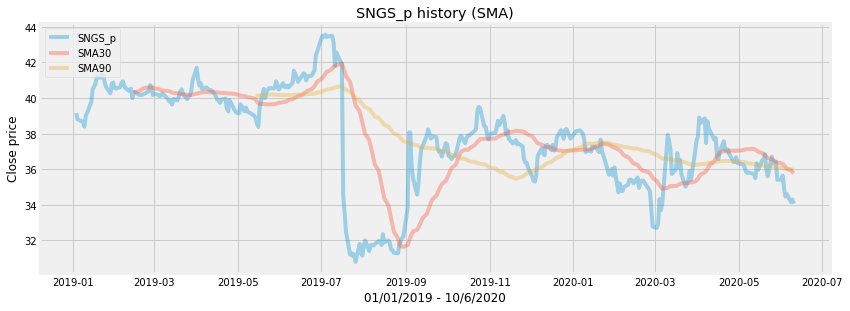

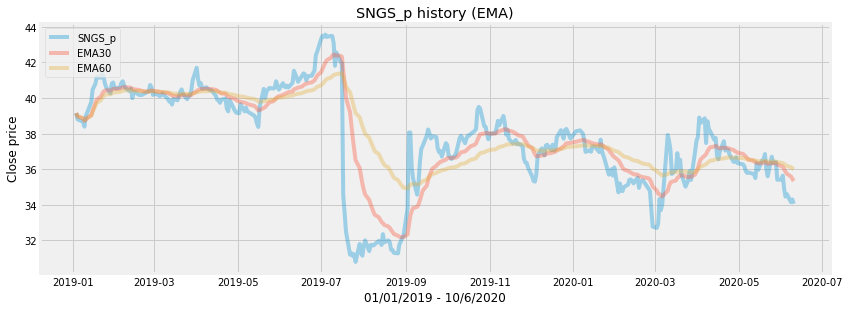

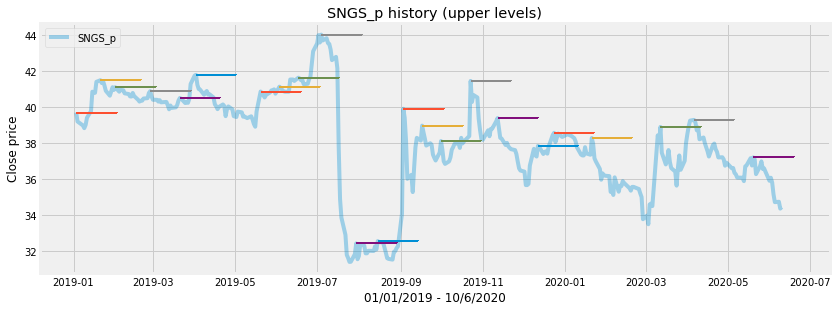

Dates / Prices of pivot points:
2019-01-03: 39.69
2019-01-21: 41.49
2019-02-01: 41.1
2019-02-27: 40.88
2019-03-21: 40.5
2019-04-02: 41.79
2019-05-20: 40.86
2019-06-03: 41.13
2019-06-17: 41.63
2019-07-04: 44.03
2019-07-30: 32.4
2019-08-15: 32.53
2019-09-03: 39.9
2019-09-17: 38.96
2019-10-01: 38.1
2019-10-23: 41.45
2019-11-12: 39.38
2019-12-12: 37.83
2019-12-24: 38.56
2020-01-21: 38.27
2020-03-12: 38.89
2020-04-06: 39.28
2020-05-20: 37.19


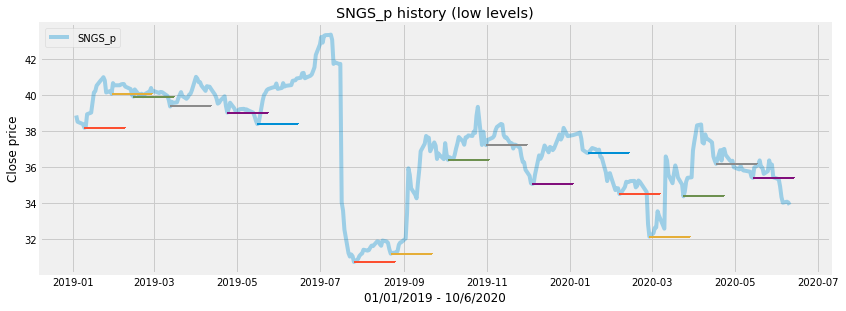

Dates / Prices of pivot points:
2019-01-09: 38.17
2019-01-29: 40.06
2019-02-14: 39.9
2019-03-13: 39.35
2019-04-24: 39.01
2019-05-16: 38.37
2019-07-26: 30.7
2019-08-22: 31.16
2019-10-03: 36.38
2019-10-31: 37.2
2019-12-04: 35.04
2020-01-14: 36.76
2020-02-06: 34.48
2020-02-28: 32.11
2020-03-24: 34.35
2020-04-17: 36.16
2020-05-14: 35.38


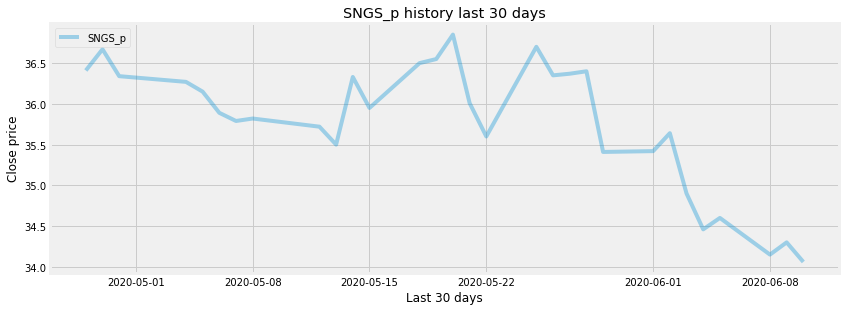

Prices Last Five days of SNGS_p = 34.46 ; 34.6 ; 34.15 ; 34.3 ; 34.06
Percentage +/- of SNGS_p = +0.41% ; -1.3% ; +0.44% ; -0.7%


In [8]:
# Подставьте данные для получения визуализации
# Сокращенное название акции можно найти на https://ru.investing.com/equities/ и https://finance.yahoo.com
stock = 'SNGS_p'
country = 'russia'

Stock_SMA(stock,country)
Stock_EMA(stock,country)
Upper_levels(stock,country)
Low_levels(stock,country)
Last_Month(stock,country)